In [198]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = pd.merge(city_df,ride_df)
# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [159]:
#group by city
bycity = pyber_df.groupby("city")

#Average Fare ($) Per City
avg_fare = bycity["fare"].mean()

#Total Number of Rides Per City
total_rides = bycity["fare"].count()

#Total Number of Drivers Per City
total_drivers = bycity['driver_count'].mean()

#City Type (Urban, Suburban, Rural)
city_type = city_df.set_index('city')['type']

#Make dataframe from gathered data to use
bycity_data = pd.DataFrame({"Average Fare Per City": avg_fare,
                          "Total Rides Per City": total_rides,
                           "Total Number of Drivers Per City": total_drivers,
                           "City Type":city_type})


## Bubble Plot of Ride Sharing Data

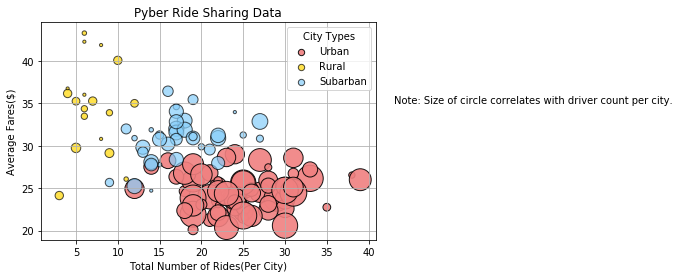

In [345]:
# Obtain the x and y coordinates for each of the three city types
urban = bycity_data[bycity_data['City Type'] == 'Urban']

rural = bycity_data[bycity_data['City Type'] == 'Rural']

suburban = bycity_data[bycity_data['City Type'] == 'Suburban']

# Build the scatter plots for each city types
plt.scatter(urban['Total Rides Per City'],urban['Average Fare Per City'],c = 'lightcoral',
            s=urban['Total Number of Drivers Per City']*10,alpha =.90,edgecolors = 'black',label = 'Urban')

plt.scatter(rural['Total Rides Per City'], rural['Average Fare Per City'], c = 'gold',
            s=rural['Total Number of Drivers Per City']*10, alpha =.70,edgecolors = 'black',label = 'Rural')

plt.scatter(suburban['Total Rides Per City'], suburban['Average Fare Per City'],c='lightskyblue',
            s=suburban['Total Number of Drivers Per City']*10, alpha=.70,edgecolors = 'black',label = 'Subarban')
# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fares($)')


# Create a legend
lgnd = plt.legend(title = 'City Types')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(43,35,'Note: Size of circle correlates with driver count per city.')

# Save Figure
plt.grid()
plt.savefig('pyber_ride_sharing_data.png')
plt.show()

## Total Fares by City Type

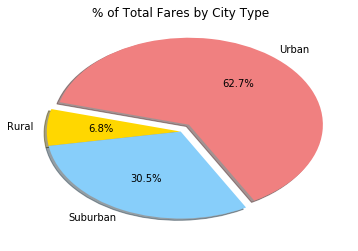

In [248]:
bytype = pyber_df.groupby('type')
# Calculate Type Percents

total_fares_bycity_percent = (bytype['fare'].sum()/pyber_df['fare'].sum())

color =['gold','lightskyblue','lightcoral']

# Build Pie Chart
label = ['Rural','Suburban','Urban']
plt.title('% of Total Fares by City Type')
plt.pie(total_fares_bycity_percent,explode = [0,0,0.1],colors =color, labels = label, shadow = True,startangle = 165
       ,autopct='%1.1f%%')

# Save Figure
plt.savefig('pyber_percent_fares.png')

In [186]:
# Show Figure
plt.show()

## Total Rides by City Type

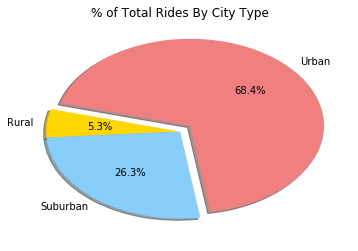

In [247]:
# Calculate Ride Percents
total_rides_bycity_type = (bytype['ride_id'].count()/pyber_df['ride_id'].count())

# Build Pie Chart
plt.title('% of Total Rides By City Type')
plt.pie(total_rides_bycity_type,explode = [0,0,0.1],colors =color, labels = label, shadow = True,startangle = 165
       ,autopct='%1.1f%%')
# Save Figure
plt.savefig('pyber_rides_bytype_percentage')

In [193]:
# Show Figure
plt.show()

## Total Drivers by City Type

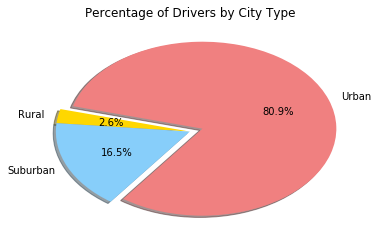

In [344]:
# Calculate Driver Percents
total_drivers_bycity_type = city_df.groupby('type').sum()/city_df['driver_count'].sum()

# Build Pie Charts
plt.title('Percentage of Drivers by City Type')
plt.pie(total_drivers_bycity_type,explode = [0,0,0.1],colors =color, labels = label, shadow = True,startangle = 165
       ,autopct='%1.1f%%')
#Save figure
plt.savefig('percentage_of_drivers_by_city_type')

In [342]:
# Show Figure
plt.show()

In [ ]:
# Observations
# 1.) Fares in the rural regions are on average much higher however less rides are given than the urban region. This is expected as driving distances are understandably greater in rural than urban.

# 2.) Rural only has 2.6% of all drivers and brings in 6.8% of all fares, while 80.9% of drivers are in Urban and bring 68.4% of all fares.

# 3.) The visualized data in its entirety reveals the value of the surburban and rural areas are, as total fares would only be 62.7% without them.